<a href="https://colab.research.google.com/github/AbdulrahmanElshafie/Word2Vec/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

## **Import requiered Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import gensim
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sb
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## **Read the document**

In [ ]:
document = pd.read_csv("embedding task.csv")

In [ ]:
string_document = document.to_csv(index=False, header=True)
print(string_document)

The apple is juicy.
The apple is in the fruit bowl.
The orange is juicy.
The orange is in the bowl.
The banana is yellow.
The banana is in the fruit bowl.
The cat is meowing.
The orange is sweet.
The cat is in the house.
The banana is sweet.
The dog is in the house.
The cat is furry.
The dog is furry.
The dog is barking.



## **Preprocessing the document**
1. Convert all text to lower case
2. Remove stop words like ("he", "she", "is", "the", ...)
3. Remove punctuation
4. Lemmatize the words (check if the word is valid in the language)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def text_preprocessing(document):
    """
    Preprocesses a document for natural language processing.
    """

    # Lowercase the text
    document = document.lower()

    # Remove punctuation
    document = re.sub(r"[^\w\s]", "", document)

    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words("english"))
    words = document.split()
    words = [word for word in words if word not in stop_words]

    # lemmatize the words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a document
    document = " ".join(words)

    return document


In [ ]:
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))

    return intersection / union

In [ ]:
list_of_text = []
for i in string_document.splitlines():
  text_processed = text_preprocessing(i)
  list_of_text.append(text_processed)
print(list_of_text)

['apple juicy', 'apple fruit bowl', 'orange juicy', 'orange bowl', 'banana yellow', 'banana fruit bowl', 'cat meowing', 'orange sweet', 'cat house', 'banana sweet', 'dog house', 'cat furry', 'dog furry', 'dog barking']


## **Tokenize and Train the Word2Vec Model**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized_text_list = []
for text in list_of_text:
  tokenized_text = word_tokenize(text)
  tokenized_text_list.append(tokenized_text)
print(tokenized_text_list)

[['apple', 'juicy'], ['apple', 'fruit', 'bowl'], ['orange', 'juicy'], ['orange', 'bowl'], ['banana', 'yellow'], ['banana', 'fruit', 'bowl'], ['cat', 'meowing'], ['orange', 'sweet'], ['cat', 'house'], ['banana', 'sweet'], ['dog', 'house'], ['cat', 'furry'], ['dog', 'furry'], ['dog', 'barking']]


In [ ]:
tokenized_text = word_tokenize(text)
print(tokenized_text)

['dog', 'barking']


In [ ]:
model2 = Word2Vec(tokenized_text_list, min_count=0, window=2, vector_size=100)

In [ ]:
word_embeddings2 = model2.wv
print(word_embeddings2)

KeyedVectors<vector_size=100, 14 keys>


In [ ]:
word_embeddings2[0]

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [ ]:
print("Word Embeddings: ")
for i in range(14):
  print(f"{tokenized_text_list[i]}: {word_embeddings2[i]}")

Word Embeddings: 
['apple', 'juicy']: [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -

## **Similarity Measures among Sentences**

In [ ]:
cosine_similarity_dog_cat = cosine_similarity(word_embeddings2[0].reshape(1, -1), word_embeddings2[2].reshape(1, -1))[0][0]
print("Cosine similarity between 'apple juicy' and 'orange juicy':", cosine_similarity_dog_cat)

Cosine similarity between 'apple juicy' and 'orange juicy': -0.05234674


In [ ]:
cosine_similarity_dog_cat = cosine_similarity(word_embeddings2[0].reshape(1, -1), word_embeddings2[13].reshape(1, -1))[0][0]
print("Cosine similarity between 'apple juicy' and 'orange juicy':", cosine_similarity_dog_cat)

Cosine similarity between 'apple juicy' and 'orange juicy': -0.04125341


In [ ]:
cosine_similarities = np.zeros((14, 14))
jaccard_similarities = np.zeros((14, 14))
_euclidean_distances = np.zeros((14, 14))

In [ ]:
for i in  range(len(word_embeddings2)):
  for j in range(len(word_embeddings2)):
    similarity = cosine_similarity(word_embeddings2[i].reshape(1, -1), word_embeddings2[j].reshape(1, -1))[0][0]
    cosine_similarities[i, j] = similarity
    cosine_similarities[j, i] = similarity

    similarity = jaccard_similarity(set(tokenized_text_list[i]), set(tokenized_text_list[j]))
    jaccard_similarities[i, j] = similarity
    jaccard_similarities[j, i] = similarity

    similarity = euclidean_distances(word_embeddings2[i].reshape(1, -1), word_embeddings2[j].reshape(1, -1))[0][0]
    _euclidean_distances[i, j] = similarity
    _euclidean_distances[j, i] = similarity

In [ ]:
print('cosine_similarities')
print(cosine_similarities)
print('--------------------------------')
print('jaccard_similarities')
print(jaccard_similarities)
print('--------------------------------')
print('_euclidean_distances')
print(_euclidean_distances)
print('--------------------------------')

cosine_similarities
[[ 1.00000000e+00 -1.08368238e-02 -5.23467399e-02 -1.11670583e-01
  -2.77503673e-02 -5.98762967e-02  1.61346868e-02  9.29172188e-02
   2.70574652e-02  2.16171414e-01  6.28507808e-02  7.96348751e-02
   9.31011215e-02 -4.12534103e-02]
 [-1.08368238e-02  9.99999940e-01 -2.36704778e-02  6.79757074e-02
   4.50679753e-03  9.38751269e-03 -1.14107221e-01 -1.15556486e-01
   3.36395577e-02 -9.57546011e-02 -1.34296253e-01  8.31517484e-03
  -3.61925969e-03  1.37250811e-01]
 [-5.23467399e-02 -2.36704778e-02  9.99999881e-01 -1.35149257e-02
   1.70188859e-01  6.40897825e-02  1.45950586e-01 -2.75401841e-03
   1.99120611e-01 -3.28431502e-02 -1.01984195e-01  1.72727913e-01
   4.65261824e-02 -1.35391682e-01]
 [-1.11670583e-01  6.79757074e-02 -1.35149257e-02  9.99999940e-01
  -4.46171127e-02  1.31490037e-01  4.15773541e-02 -1.36797419e-02
   7.49755949e-02 -1.69370219e-01  1.29799712e-02  4.13081013e-02
  -9.25341435e-03  6.59847073e-03]
 [-2.77503673e-02  4.50679753e-03  1.70188859e-0

<Axes: >

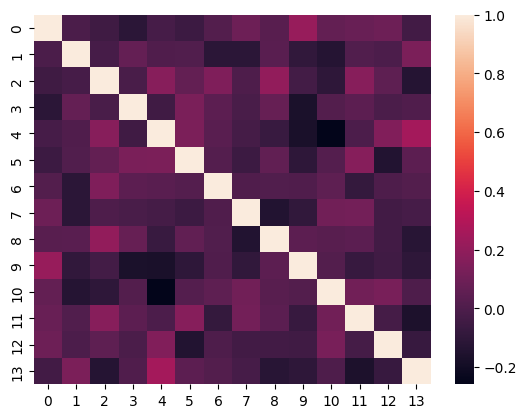

In [ ]:
sb.heatmap(cosine_similarities)

<Axes: >

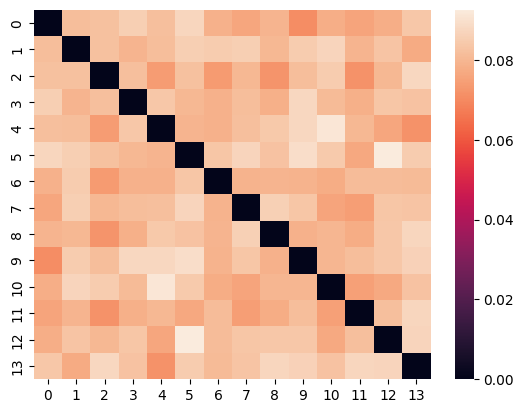

In [ ]:
sb.heatmap(_euclidean_distances)

<Axes: >

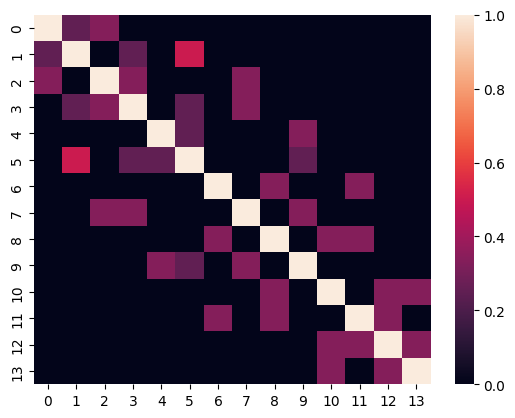

In [ ]:
sb.heatmap(jaccard_similarities)

In [ ]:
n_components = 2
mds1 = MDS(n_components=n_components, dissimilarity="precomputed", random_state=42)
mds2 = MDS(n_components=n_components, dissimilarity="precomputed", random_state=42)
mds3 = MDS(n_components=n_components, dissimilarity="precomputed", random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-180-b66f4b961dac>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(cosine_similarities_reduced[:, 0], cosine_similarities_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))
<ipython-input-180-b66f4b961dac>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cosine_similarities_reduced[:, 0], cosine_similarities_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))


Dimesnion of X after MDS =  (14, 2)


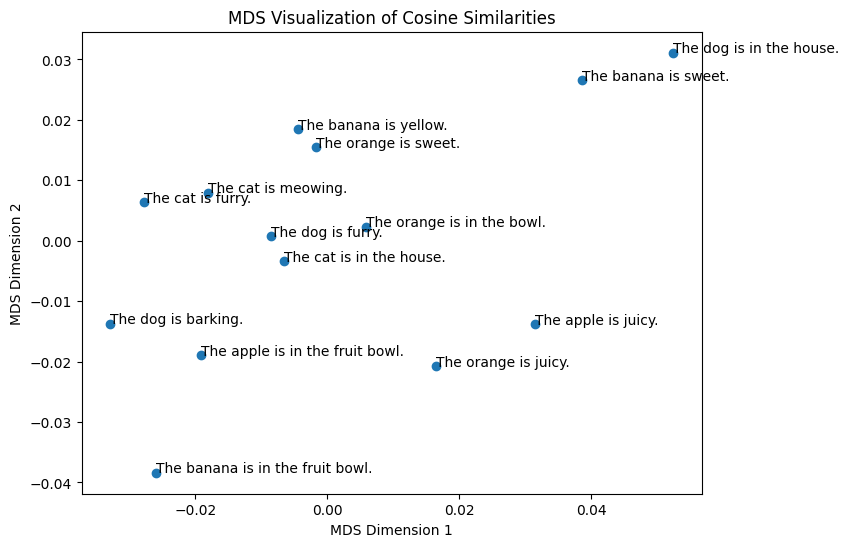

In [ ]:
# Fit the MDS model to your data
cosine_similarities_reduced = mds1.fit_transform(cosine_similarities)

print('Dimesnion of X after MDS = ',cosine_similarities_reduced.shape)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(cosine_similarities_reduced[:, 0], cosine_similarities_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))

for  i, txt in enumerate(string_document.splitlines()):
  plt.annotate(txt, (cosine_similarities_reduced[i, 0], cosine_similarities_reduced[i, 1]))

plt.title("MDS Visualization of Cosine Similarities")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-181-71823e17918e>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jaccard_similarities_reduced[:, 0], jaccard_similarities_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))
<ipython-input-181-71823e17918e>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(jaccard_similarities_reduced[:, 0], jaccard_similarities_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))


Dimesnion of X after MDS =  (14, 2)


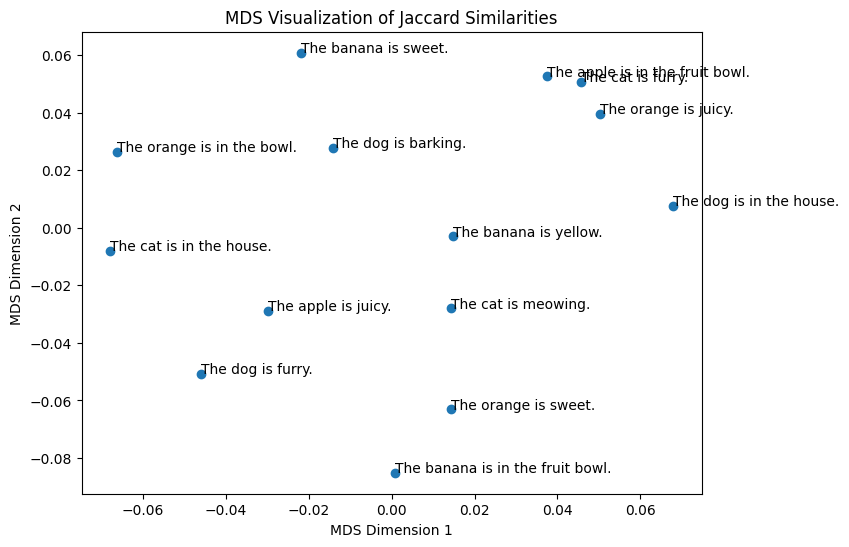

In [ ]:
# Fit the MDS model to your data
jaccard_similarities_reduced = mds2.fit_transform(jaccard_similarities)

print('Dimesnion of X after MDS = ',jaccard_similarities_reduced.shape)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(jaccard_similarities_reduced[:, 0], jaccard_similarities_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))

for  i, txt in enumerate(string_document.splitlines()):
  plt.annotate(txt, (jaccard_similarities_reduced[i, 0], jaccard_similarities_reduced[i, 1]))

plt.title("MDS Visualization of Jaccard Similarities")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-182-96d291d662a4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(_euclidean_distances_reduced[:, 0], _euclidean_distances_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))
<ipython-input-182-96d291d662a4>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(_euclidean_distances_reduced[:, 0], _euclidean_distances_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))


Dimesnion of X after MDS =  (14, 2)


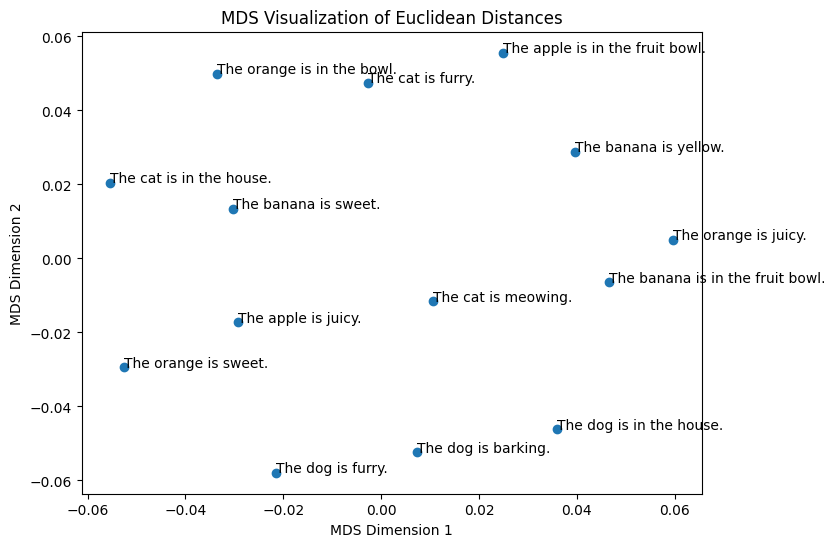

In [ ]:
# Fit the MDS model to your data
_euclidean_distances_reduced = mds3.fit_transform(_euclidean_distances)

print('Dimesnion of X after MDS = ',_euclidean_distances_reduced.shape)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(_euclidean_distances_reduced[:, 0], _euclidean_distances_reduced[:, 1], cmap=plt.cm.get_cmap("jet", 10))

for  i, txt in enumerate(string_document.splitlines()):
  plt.annotate(txt, (_euclidean_distances_reduced[i, 0], _euclidean_distances_reduced[i, 1]))

plt.title("MDS Visualization of Euclidean Distances")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()